In [1]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 835.00 KiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img

2025-12-02 05:07:27.421705: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-02 05:07:27.447830: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-02 05:07:27.447867: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-02 05:07:27.447888: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-02 05:07:27.454271: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-02 05:07:27.454981: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

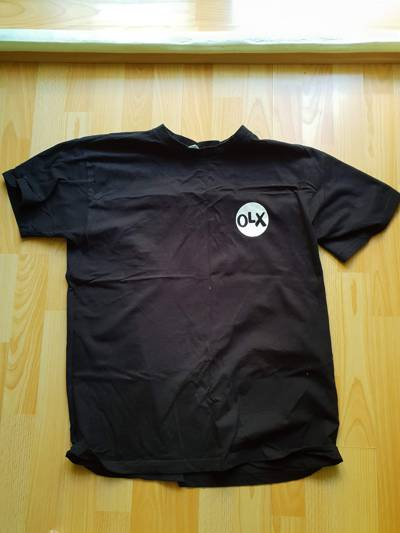

In [4]:
path = './clothing-dataset-small/train/t-shirt/5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
load_img(path)

In [5]:
img = load_img(path, target_size=(299,299))

In [6]:
x = np.array(img)
x.shape

(299, 299, 3)

**Pre-Trained convolutional netral networks**

In [7]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [8]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

In [9]:
X = np.array([x])
X = preprocess_input(X)
#It turns the color bytes (0-255) to a number between the -1 and 1

In [10]:
pred = model.predict(X)

1/1 [==============================] - 1s 557ms/step


In [11]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.6819631),
  ('n02916936', 'bulletproof_vest', 0.038140077),
  ('n04370456', 'sweatshirt', 0.03432481),
  ('n03710637', 'maillot', 0.011354226),
  ('n04525038', 'velvet', 0.0018453628)]]

We didn't get desired results

### Transfer Learning


> Making customized dense layers and adding our classes for better and customized prediction




In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train/',
    target_size=(150,150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [14]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [15]:
x ,y = next(train_ds)
# X = Feature, images
# y = Labels

In [16]:
x

array([[[[-0.8745098 , -0.9607843 , -0.99215686],
         [-0.8745098 , -0.9607843 , -0.99215686],
         [-0.8745098 , -0.9607843 , -0.99215686],
         ...,
         [-0.827451  , -0.94509804, -0.96862745],
         [-0.827451  , -0.94509804, -0.96862745],
         [-0.827451  , -0.94509804, -0.96862745]],

        [[-0.85882354, -0.94509804, -0.9764706 ],
         [-0.85882354, -0.94509804, -0.9764706 ],
         [-0.85882354, -0.94509804, -0.9764706 ],
         ...,
         [-0.8039216 , -0.94509804, -0.9764706 ],
         [-0.8039216 , -0.94509804, -0.9764706 ],
         [-0.8039216 , -0.94509804, -0.9764706 ]],

        [[-0.8666667 , -0.9529412 , -0.9843137 ],
         [-0.8666667 , -0.9529412 , -0.9843137 ],
         [-0.8666667 , -0.9529412 , -0.9843137 ],
         ...,
         [-0.7882353 , -0.9372549 , -0.99215686],
         [-0.7882353 , -0.9372549 , -0.99215686],
         [-0.7882353 , -0.9372549 , -0.99215686]],

        ...,

        [[-0.04313725, -0.10588235, -0

In [17]:

x.shape

(32, 150, 150, 3)

In [18]:
y[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [19]:
# This 'y' is some kind of the hot-encoding for our classes
# Multiclass classification

In [20]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation/',
    target_size=(150,150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [21]:
# Here we use Xception as a base model and we gonna build our model on top of it
# Our model is customized to classification in our classes like dresses

In [22]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)
# 'Include_top = false' is for saving the convolutional layers for our use case
# When we turn it to false it will remove the dense layers

base_model.trainable = False
# It means we don't want to change the convolutional layers

# Now we want to make new top layers

In [23]:
inputs = keras.Input(shape=(150,150,3))
# This the input images

base = base_model(inputs, training=False)
# The image goes into the base mdoel

vectors = keras.layers.GlobalAveragePooling2D()(base)
# We turn the base model 3 dimenstional output to 1 dimenstional that calls pooling

outputs = keras.layers.Dense(10)(vectors)
# Here we have dese layers to turn the vector presentation to predictions
# We set it to 10 because we have 10 classes

model = keras.Model(inputs, outputs)

In [24]:
# 'preds = inputs' and 'x = outputs' of the model
preds = model.predict(x)

1/1 [==============================] - 1s 918ms/step


In [25]:
preds.shape

(32, 10)

# Train the mdoel

> We need an optimizer ( Changing the weights to train the model)

> We will use 'Adam' as our optimizer





In [26]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(
    learning_rate = learning_rate
)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [27]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [28]:
history = model.fit(
    train_ds,
    epochs = 10,
    validation_data = val_ds
)

Epoch 1/10
96/96 [==============================] - 46s 467ms/step - loss: 1.2145 - accuracy: 0.6734 - val_loss: 0.8003 - val_accuracy: 0.7801
Epoch 2/10
96/96 [==============================] - 45s 474ms/step - loss: 0.5358 - accuracy: 0.8299 - val_loss: 0.8484 - val_accuracy: 0.7889
Epoch 3/10
96/96 [==============================] - 45s 467ms/step - loss: 0.3307 - accuracy: 0.8833 - val_loss: 0.8843 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 46s 475ms/step - loss: 0.2162 - accuracy: 0.9201 - val_loss: 0.8219 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 43s 445ms/step - loss: 0.1588 - accuracy: 0.9430 - val_loss: 0.8301 - val_accuracy: 0.8152
Epoch 6/10
96/96 [==============================] - 43s 450ms/step - loss: 0.1048 - accuracy: 0.9645 - val_loss: 0.8782 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 43s 448ms/step - loss: 0.0586 - accuracy: 0.9811 - val_loss: 0.8657 - val_accuracy: 0.8358

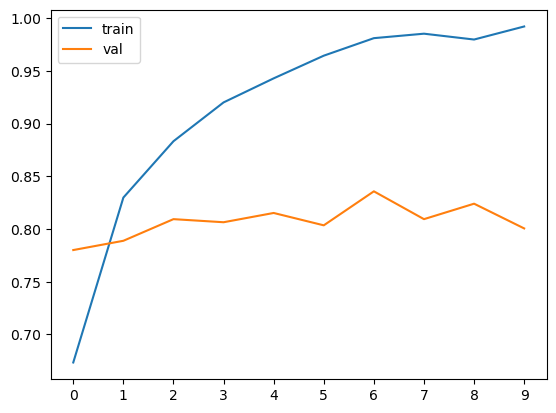

In [29]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.xticks(np.arange(10))
plt.legend()

## Adjusting the learning rate

In [30]:
def make_model(learning_rate=0.01):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )
  base_model.trainable = False

  ######################################################

  inputs = keras.Input(shape=(150,150,3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)
  outputs = keras.layers.Dense(10)(vectors)
  model = keras.Model(inputs, outputs)

  ######################################################

  preds = model.predict(x)

  optimizer = keras.optimizers.Adam(
    learning_rate = learning_rate
    )

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(
      optimizer=optimizer,
      loss=loss, metrics=['accuracy']
      )

  return model

In [31]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
  print(lr)

  model = make_model(learning_rate=lr)
  history = model.fit(
      train_ds,
      epochs = 10,
      validation_data = val_ds
  )
  scores[lr] = history.history

  print()
  print()

0.0001
1/1 [==============================] - 1s 875ms/step
Epoch 1/10
96/96 [==============================] - 45s 445ms/step - loss: 2.0089 - accuracy: 0.3201 - val_loss: 1.6109 - val_accuracy: 0.4839
Epoch 2/10
96/96 [==============================] - 42s 440ms/step - loss: 1.4178 - accuracy: 0.5535 - val_loss: 1.2482 - val_accuracy: 0.6158
Epoch 3/10
96/96 [==============================] - 42s 438ms/step - loss: 1.1660 - accuracy: 0.6369 - val_loss: 1.0584 - val_accuracy: 0.6804
Epoch 4/10
96/96 [==============================] - 42s 437ms/step - loss: 1.0227 - accuracy: 0.6822 - val_loss: 0.9478 - val_accuracy: 0.7097
Epoch 5/10
96/96 [==============================] - 47s 495ms/step - loss: 0.9270 - accuracy: 0.7053 - val_loss: 0.8710 - val_accuracy: 0.7331
Epoch 6/10
96/96 [==============================] - 47s 486ms/step - loss: 0.8583 - accuracy: 0.7256 - val_loss: 0.8190 - val_accuracy: 0.7566
Epoch 7/10
96/96 [==============================] - 45s 463ms/step - loss: 0.8037 

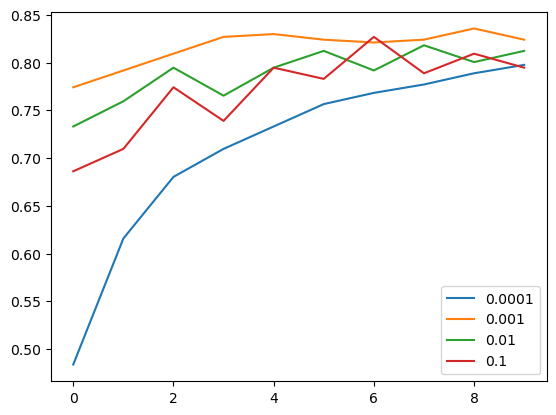

In [32]:
 for lr, hist in scores.items():
   plt.plot(hist['val_accuracy'], label=lr)
 #  plt.plot(hist['accuracy'], label=lr)
 plt.legend()

In [33]:
del scores[0.1]
del scores[0.0001]

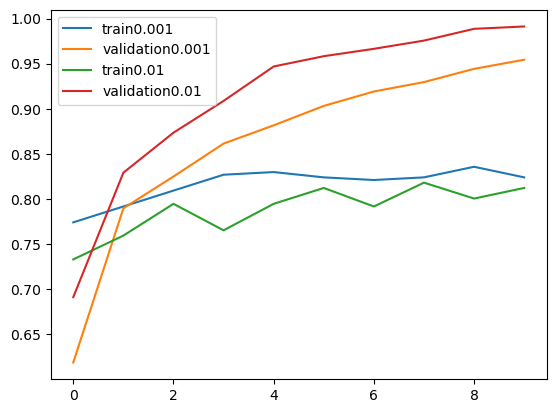

In [34]:
 for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('train%s' % lr))
    plt.plot(hist['accuracy'], label=('validation%s' % lr))
 plt.legend()

In [35]:
learning_rate = 0.001

## Checkpointing
<p> - Saving the best model only</p>
<p> - Tranging a model with callbacks</p>

In [36]:
model.save_weights('model_v1.h5', save_format='h5')

In [38]:
'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5'.format(epoch=12, val_accuracy=0.824234)
# This Keras template to saving files that contain epoch number and accuracy and version in file name

'xception_v1_12_0.824.h5'

In [40]:
checkpoint = keras.callbacks.ModelCheckpoint(
     'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
     save_best_only=True,
     monitor='val_accuracy',
     mode='max'
 )

In [41]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds,
    epochs = 10,
    validation_data = val_ds,
    callbacks=[checkpoint]
)

1/1 [==============================] - 1s 1s/step
Epoch 1/10
96/96 [==============================] - 44s 437ms/step - loss: 1.1272 - accuracy: 0.6239 - val_loss: 0.7365 - val_accuracy: 0.7654
Epoch 2/10


/opt/conda/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 40s 421ms/step - loss: 0.6276 - accuracy: 0.7819 - val_loss: 0.6106 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 40s 412ms/step - loss: 0.5054 - accuracy: 0.8390 - val_loss: 0.5580 - val_accuracy: 0.8152
Epoch 4/10
96/96 [==============================] - 41s 423ms/step - loss: 0.4277 - accuracy: 0.8664 - val_loss: 0.5509 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 41s 427ms/step - loss: 0.3696 - accuracy: 0.8859 - val_loss: 0.5397 - val_accuracy: 0.8240
Epoch 6/10
96/96 [==============================] - 43s 447ms/step - loss: 0.3238 - accuracy: 0.9097 - val_loss: 0.5342 - val_accuracy: 0.8211
Epoch 7/10
96/96 [==============================] - 40s 411ms/step - loss: 0.2872 - accuracy: 0.9205 - val_loss: 0.5130 - val_accuracy: 0.8328
Epoch 8/10
96/96 [==============================] - 39s 410ms/step - loss: 0.2584 - accuracy: 0.9355 - val_loss: 0.5239 - val_accuracy: 0.8299
Epoch 9/10

<h3>Adding more layres</h3>

In [56]:
def make_model(learning_rate=0.001,size_inner=100):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )
  base_model.trainable = False

  ######################################################

  inputs = keras.Input(shape=(150,150,3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)
    
  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

  outputs = keras.layers.Dense(10)(inner)
    
  model = keras.Model(inputs, outputs)

  ######################################################

  preds = model.predict(x)

  optimizer = keras.optimizers.Adam(
    learning_rate = learning_rate
    )

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(
      optimizer=optimizer,
      loss=loss, metrics=['accuracy']
      )

  return model

In [57]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
  print(size)

  model = make_model(learning_rate=learning_rate, size_inner=size)
  history = model.fit(
      train_ds,
      epochs = 10,
      validation_data = val_ds
  )
  scores[size] = history.history

  print()
  print()

10
1/1 [==============================] - 1s 1s/step
Epoch 1/10
96/96 [==============================] - 44s 438ms/step - loss: 1.7129 - accuracy: 0.4110 - val_loss: 1.3827 - val_accuracy: 0.5953
Epoch 2/10
96/96 [==============================] - 44s 454ms/step - loss: 1.1521 - accuracy: 0.6506 - val_loss: 1.0545 - val_accuracy: 0.6833
Epoch 3/10
96/96 [==============================] - 44s 459ms/step - loss: 0.8116 - accuracy: 0.7477 - val_loss: 0.8121 - val_accuracy: 0.7361
Epoch 4/10
96/96 [==============================] - 44s 458ms/step - loss: 0.6132 - accuracy: 0.8012 - val_loss: 0.6491 - val_accuracy: 0.7977
Epoch 5/10
96/96 [==============================] - 44s 459ms/step - loss: 0.5103 - accuracy: 0.8400 - val_loss: 0.6056 - val_accuracy: 0.8065
Epoch 6/10
96/96 [==============================] - 44s 461ms/step - loss: 0.4389 - accuracy: 0.8628 - val_loss: 0.5770 - val_accuracy: 0.8035
Epoch 7/10
96/96 [==============================] - 44s 459ms/step - loss: 0.3947 - accur

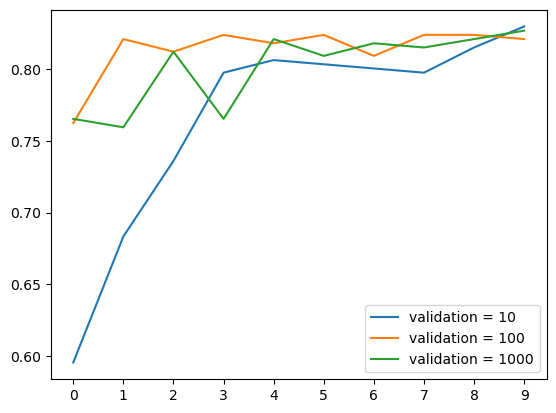

In [58]:
 for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('validation = %s' % size))
 plt.xticks(np.arange(10))
 plt.legend()

<p>As we don't see many changes with adding inner layers so we ignore it or hold its number low</p>

<h3>Regularization and Dropout</h3>

In [59]:
def make_model(learning_rate=0.001,size_inner=100, droprate=0.5):
  base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
    )
  base_model.trainable = False

  ######################################################

  inputs = keras.Input(shape=(150,150,3))
  base = base_model(inputs, training=False)
  vectors = keras.layers.GlobalAveragePooling2D()(base)
    
  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    
  drop = keras.layers.Dropout(droprate)(inner)
    
  outputs = keras.layers.Dense(10)(drop)
    
  model = keras.Model(inputs, outputs)

  ######################################################

  preds = model.predict(x)

  optimizer = keras.optimizers.Adam(
    learning_rate = learning_rate
    )

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(
      optimizer=optimizer,
      loss=loss, metrics=['accuracy']
      )

  return model

In [60]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
  print(droprate)

  model = make_model(
      learning_rate=learning_rate,
      size_inner=size,
      droprate=droprate
  )
    
  history = model.fit(
      train_ds,
      epochs = 30,
      validation_data = val_ds
  )
  scores[droprate] = history.history

  print()
  print()

0.0
1/1 [==============================] - 1s 899ms/step
Epoch 1/30
96/96 [==============================] - 46s 464ms/step - loss: 0.9681 - accuracy: 0.6760 - val_loss: 0.6764 - val_accuracy: 0.7830
Epoch 2/30
96/96 [==============================] - 44s 456ms/step - loss: 0.5214 - accuracy: 0.8207 - val_loss: 0.6048 - val_accuracy: 0.8123
Epoch 3/30
96/96 [==============================] - 44s 454ms/step - loss: 0.3671 - accuracy: 0.8784 - val_loss: 0.5512 - val_accuracy: 0.8240
Epoch 4/30
96/96 [==============================] - 44s 455ms/step - loss: 0.2608 - accuracy: 0.9156 - val_loss: 0.5633 - val_accuracy: 0.8035
Epoch 5/30
96/96 [==============================] - 44s 457ms/step - loss: 0.1808 - accuracy: 0.9488 - val_loss: 0.5492 - val_accuracy: 0.8211
Epoch 6/30
96/96 [==============================] - 43s 453ms/step - loss: 0.1201 - accuracy: 0.9752 - val_loss: 0.5376 - val_accuracy: 0.8299
Epoch 7/30
96/96 [==============================] - 44s 456ms/step - loss: 0.0902 - a

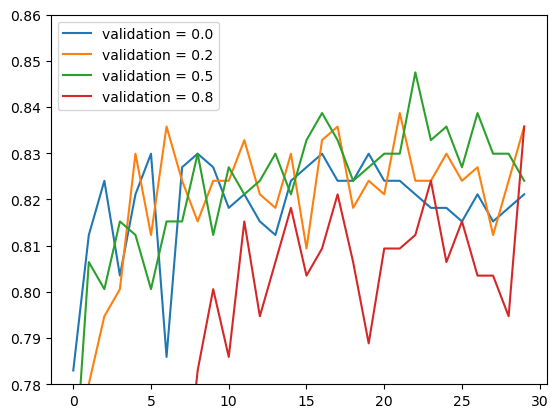

In [63]:
 for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('validation = %s' % droprate))

 plt.ylim(0.78, 0.86)
 plt.legend()

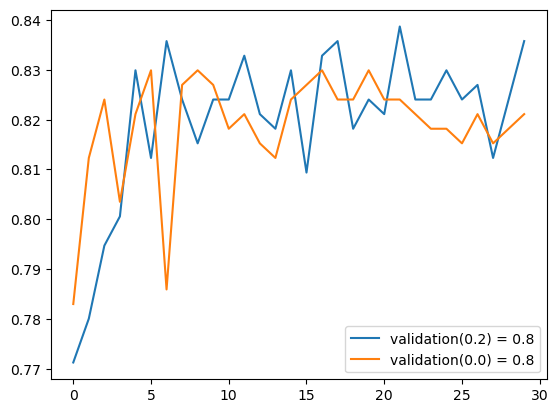

In [73]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=('validation(0.2) = %s' % droprate))
#plt.plot(hist['accuracy'], label=('train(0.2) = %s' % droprate))
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=('validation(0.0) = %s' % droprate))
#plt.plot(hist['accuracy'], label=('train(0.0) = %s' % droprate))

plt.legend()